In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Nicholson & Bailey (1935) introduced this model to study oscillations in a system in which a parasitoid controls the host population.

$$
{N_{t+1}=\lambda N_{t} \exp \left[-a P_{t}\right]} \\
{P_{t+1}=b N_{t}\left(1-\exp \left[-a P_{t}\right]\right)}
$$

with the possible extension for logistic growth of prey:
$$
\lambda_t = \operatorname{Exp}\left(r\left(1-\frac{N_{t}}{K}\right)\right)
$$

In [15]:
def step(N, P, λ, a, b):
    return (
        λ * N * np.exp(-a * P),
        b * N * (1 - np.exp(-a * P))
    )

In [8]:
def multistep(N0, P0, λ, a, b, tmax):
    N, P = np.empty((2, tmax))
    N[0], P[0] = N0, P0
    for t in range(1, tmax):
        N[t], P[t] = step(N[t-1], P[t-1], λ, a, b)
    return N, P

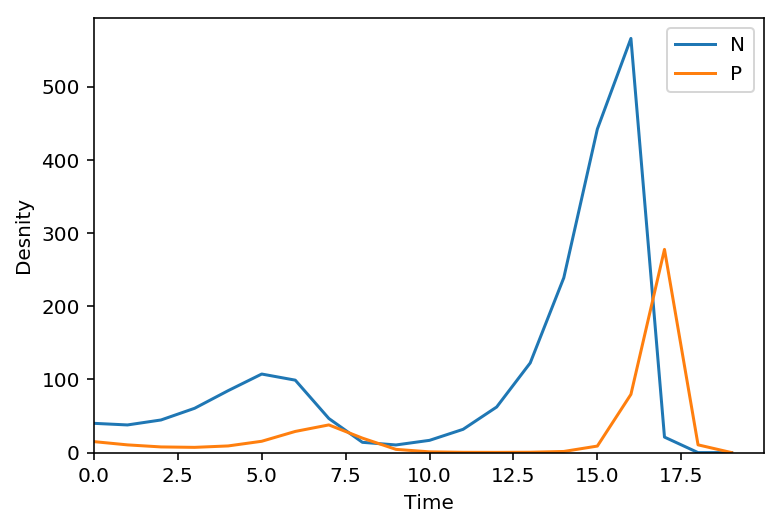

In [14]:
λ, a, b = 2, 0.05, 0.5
N0, P0 = 40, 15

N, P = multistep(N0, P0, λ, a, b, tmax=20)
plt.plot(N, label='N')
plt.plot(P, label='P')
plt.xlabel('Time')
plt.ylabel('Desnity')
plt.xlim(0, None)
plt.ylim(0, None)
plt.legend();